1) Create a dataframe with the collected data using pandas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("user2.csv")

# Display the DataFrame
print(df)

# Drop the "timestamp" column as it is not important
df.drop(columns="Timestamp", inplace=True)

# Save the DataFrame to a new CSV file
df.to_csv("updated_user.csv", index=False)


                        Timestamp What is your age? What is your gender?  \
0    2024/02/28 10:11:34 PM GMT+6           21 - 25               Female   
1    2024/02/28 10:28:22 PM GMT+6           21 - 25                 Male   
2    2024/02/28 10:54:58 PM GMT+6           21 - 25                 Male   
3    2024/03/01 11:40:40 PM GMT+6           21 - 25                 Male   
4    2024/03/01 11:45:48 PM GMT+6           21 - 25                 Male   
..                            ...               ...                  ...   
315  2024/04/27 10:44:09 PM GMT+6           31 - 35                 Male   
316  2024/04/27 10:44:29 PM GMT+6           36 - 40               Female   
317  2024/04/27 10:44:47 PM GMT+6           31 - 35               Female   
318  2024/04/27 10:45:13 PM GMT+6           36 - 40                 Male   
319  2024/04/27 10:45:33 PM GMT+6           36 - 40                 Male   

    Which city do you currently reside in?  \
0                                   Uttar

2) Please describe the information regarding data using pandas.

In [ ]:
# Display the summary, statistics, and first few rows
print("Summary:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())
print("\nFirst Few Rows:")
print(df.head())


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 15 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   What is your age?                                                                                           320 non-null    object 
 1   What is your gender?                                                                                        320 non-null    object 
 2   Which city do you currently reside in?                                                                      320 non-null    object 
 3   Which university did you get your bachelor's degree from?                                                   320 non-null    object 
 4   What was your field of study?                              


3) Conduct the cleaning on the data if there is any:
• Empty cells
• Data in wrong format
• Wrong data
• Duplicates

In [ ]:
# Handling empty cells: drop rows with missing values
df.dropna(inplace=True)

# Handling data in the wrong format: The only open ended question is 'which chity do you reside in,
#therefore we only have to fix the data for that column.

# Standardize city names to title case
df['Which city do you currently reside in?'] = df['Which city do you currently reside in?'].str.title()

# Remove leading and trailing white spaces
df['Which city do you currently reside in?'] = df['Which city do you currently reside in?'].str.strip()


# Handling wrong data: our collected data is unlikely to be wrong as all are close ended questions
#and user has to select one from the options set by us.


# Handling duplicates:
df.drop_duplicates(inplace=True)

# After cleaning, reset the index
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df)


4) Organize the data into a JSON file and then read this JSON data.

In [ ]:
# Convert the DataFrame to JSON and save it to a file
df.to_json("user_data.json", orient="records")

# Read the JSON file back into a DataFrame
df_from_json = pd.read_json("user_data.json")

# Display the DataFrame read from JSON
print(df_from_json)

    What is your age? What is your gender?  \
0             21 - 25                 Male   
1             21 - 25                 Male   
2             21 - 25                 Male   
3             21 - 25                 Male   
4             21 - 25                 Male   
..                ...                  ...   
262           31 - 35                 Male   
263           36 - 40               Female   
264           31 - 35               Female   
265           36 - 40                 Male   
266           36 - 40                 Male   

    Which city do you currently reside in?  \
0                              Bashundhara   
1                                    Dhaka   
2                                    Dhaka   
3                                    Dhaka   
4                                    Dhaka   
..                                     ...   
262                                  Dhaka   
263                                  Dhaka   
264                              

5) Do you think scaling is necessary in this case? Justify

Answer: We think scaling is not necessary in this case, because all our questions have multiple choices, and the user must select from the given options. Therefore, there is no scope for any range to be too big, as all the options were set by us.

6) Develop necessary hypothesis that might support your understanding on the developed datasets.

Answer:
**hypothesis 1:** People who did more online courses get jobs faster. This hypothesis focuses on the knowledge development aspect of online courses. It predicts that the additional knowledge gained from online courses will help graduates get faster employment.
**hypothesis 2:** People who did more online courses get higher paid jobs. This hypothesis digs deeper into the potential financial benefit of online courses. It assumes that the skills or knowledge acquired through online courses translate to higher-paying jobs.
**hypothesis 3:** People who did more online courses are more satisfied with their jobs. This hypothesis focuses on the level of job satisfaction and its relation to the amount of online courses completed.

**hypothesis 4:** People who graduate with a higher CGPA tend to have completed more online courses. This hypothesis is based on the assumption that doing online courses help students improve their performance in academic courses as well, resulting in a higher CGPA.


7) Calculate the relationship between each column in your data set. The find out the most valuable features that will support you hypothesis and you will do your further analysis and data mining task. For this use seaborn python library to visualize the correlation matrix.


Column 'What is your age?': ['21 - 25' '31 - 35' '40+' '26 - 30' '36 - 40']
Column 'What is your gender?': ['Male' 'Female']
Column 'Which city do you currently reside in?': ['Bashundhara' 'Dhaka' 'Rajshahi' 'Kulaura' 'Chittagong' 'Sylhet' 'Khulna'
 'Calgary' 'Rangpur' 'Alberta' 'Subang Jaya' 'Kuala Lampur']
Column 'Which university did you get your bachelor's degree from?': ['North South University' 'AIUB' 'IUB' 'NSU' 'Leading University'
 'Brac University' 'Dhaka University' 'KUET' 'BUET'
 'University of Calgary' 'East West University' 'University of Chittagong'
 'University of Alberta' 'Khulna University' 'Monash University Malaysia'
 'Monash University ' 'Monash University' 'Segi University'
 'Ahsanullah University' 'CUET']
Column 'What was your field of study?': ['Science/Technology/Engineering/Math' 'Business/Economics'
 'Arts/Humanities/Social Sciences']
Column 'What CGPA did you graduate with?': ['3.0 - 3.5' '3.5 - 4.0' '2.5 - 3.0' '2.0 - 2.5']
Column 'Did you do any online cou

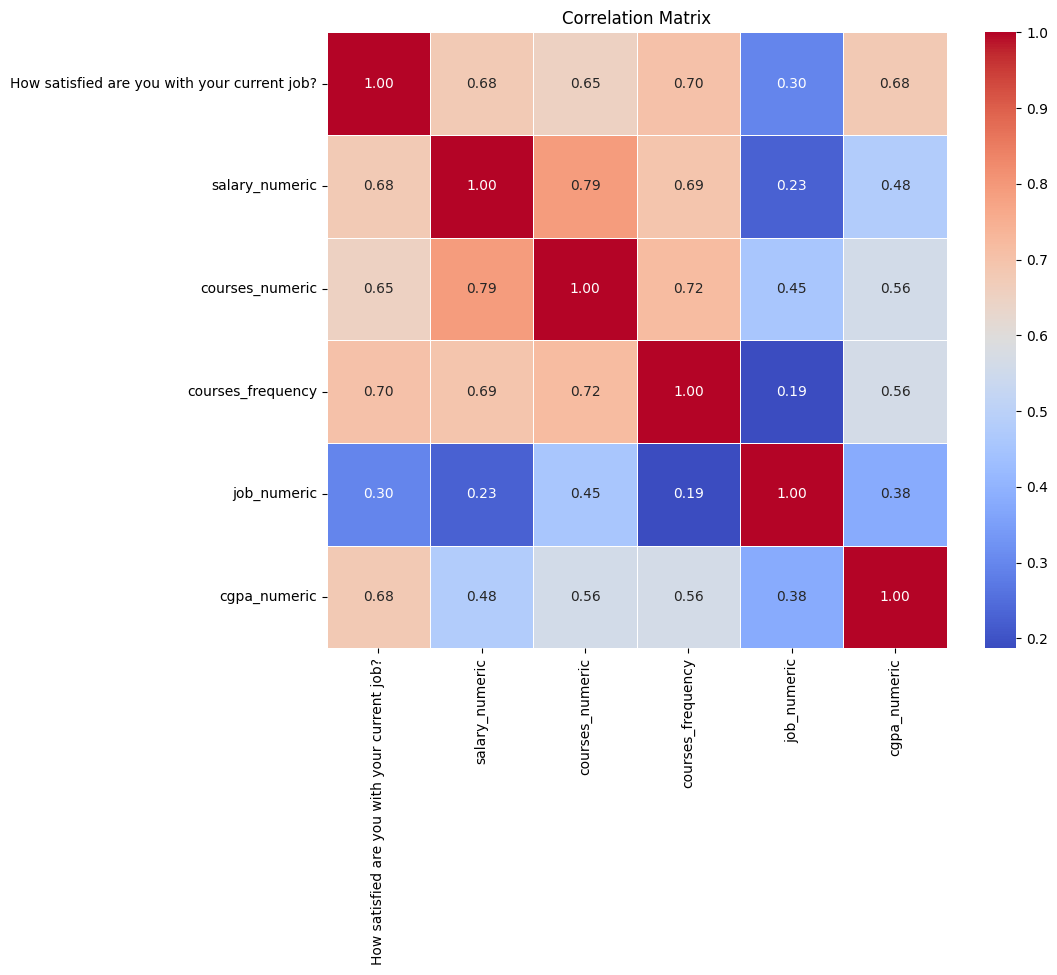

In [ ]:
#Conduct necessary conversions

salary_mapping = {
    "Under 20,000": 10000,
    "20,000 - 50,000": 35000,
    "50,000 - 80,000": 65000,
    "80,000 - 110,000" : 95000,
    "110,000 - 150,000" : 135000,
    "150,000 - 200,000" : 175000,
    "above 200,000": 250000
}
df['salary_numeric'] = df['What is your current monthly earning?'].map(salary_mapping)

course_mapping = {
    "1 - 3": 2,
    "4 - 6": 5,
    "7 - 9": 8,
    "10+": 12
}

# Map the course ranges to numeric values
df['courses_numeric'] = df['How many online courses did you do altogether?'].map(course_mapping)

course_frequency_mapping = {
    "Very Often": 12,
    "Often": 8,
    "Sometimes": 5,
    "Rarely": 2
}

# Map the course ranges to numeric values
df['courses_frequency'] = df['How often did you resort to online courses each semester?'].map(course_frequency_mapping)

job_mapping = {
    "Immediately after": 12,
    "Less than a month": 10.5,
    "1-3 months":  7.5,
    "3-6 months": 4.5,
    "6-9 months": 3,
    "9-12 months": 1.5,
    "More than a year": 0.5
}

# Map the time ranges to numeric values
df['job_numeric'] = df['How long did it take you to get a job after graduation?'].map(job_mapping)

cgpa_mapping = {
    "3.5 - 4.0": 3.75,
    "3.0 - 3.5": 3.25,
    "2.5 - 3.0": 2.75,
    "2.0 - 2.5": 2.25,
    "1.0 - 2.0": 1.5
}

# Map the CGPA ranges to numeric values
df['cgpa_numeric'] = df['What CGPA did you graduate with?'].map(cgpa_mapping)



# Display unique values in each column to identify non-numeric columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

# Remove non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Q1) Linear Regression

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df[['courses_numeric', 'courses_frequency', 'cgpa_numeric']]
y = df['salary_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Example prediction for a new student
new_student = [[5, 3, 3.8]]  # Example: 5 courses, 3 times online class frequency, CGPA of 3.8
predicted_salary = model.predict(new_student)
print("Predicted Salary for the new student:", predicted_salary)


Mean Squared Error: 886488144.6600213
R-squared: 0.6528905103060672
Predicted Salary for the new student: [73870.95061645]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


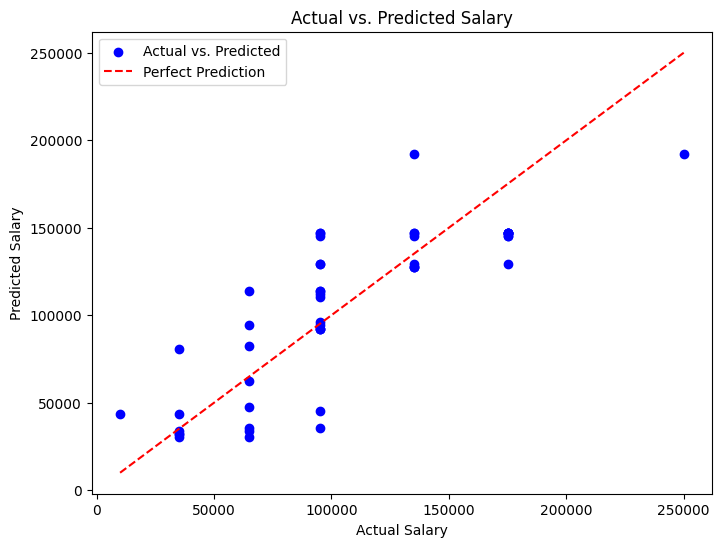

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted salary
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()


Q2) Logistic Regression

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df[['courses_numeric', 'courses_frequency', 'cgpa_numeric']]
# y = df['salary_numeric']
median_salary = df['salary_numeric'].median()
y=df['salary_binary'] = df['salary_numeric'].apply(lambda x: 'high' if x > median_salary else 'low')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


# Example prediction for a new student
new_student = [[9, 7, 3.8]]  # Example: 9 courses, 7 times online class frequency, CGPA of 3.8
predicted_salary = model.predict(new_student)
print("Predicted Salary for the new student:", predicted_salary)


Accuracy: 0.8837209302325582
Predicted Salary for the new student: ['high']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Q3) KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df[['courses_numeric', 'courses_frequency', 'cgpa_numeric']]
y = df['salary_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
k = 8
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Example prediction for a new student
new_student = [[5, 3, 3.8]]  # Example: 5 courses, 3 times online class frequency, CGPA of 3.8
new_student_scaled = scaler.transform(new_student)
predicted_salary = model.predict(new_student_scaled)
print("Predicted Salary for the new student:", predicted_salary)


Mean Squared Error: 643304869.1860465
R-squared: 0.720614287161329
Predicted Salary for the new student: [61250.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
